# Business Activity Trends

## Summary
Business Activity Trends During Crisis uses data about posting activity on Facebook to measure how local businesses are affected by and recover from crisis events. Given the broad presence of small businesses on the Facebook platform, this dataset aims to provide timely estimates of global business activity without the common limitations of traditional data collection methods, such as scale, speed and nonstandardization. This data will allow us, for example, to detect the economic sectors that were affected the most and how they are recovering from the event. 

This notebook provides an introduction to Business Activity Trends dataset and demonstrates how to leverage this data to study economic activity disaggregated by sectors after a crisis event. 

## Learning Objectives
### Overall goals
The main goal of this class is to teach the student to leverage the Business Activity Trends dataset to study economic recovery after a crisis event. 

### Specific goals
1. **Understand the dataset**:
- Learn how the dataset is created.
- Understand the dataset structure and the meaning of its variables.
- Understand the limitations of the dataset.
2. **Analysis of the dataset**:
- Load the dataset and analyze it.
- Visualize the dataset to inform the status of businesses after a crisis event.

## Data
The Business Activity Trends dataset is provided by [Meta](https://dataforgood.facebook.com/dfg/tools/business-activity-trends) and is created for each particular crisis event. The data consists of daily business activity quantile information at a GADM 2 level broken down by business vertical. Each cell (row) of the dataset contains data on the daily activity within a polygon-vertical combination.

**Population Sample**:
The Business Activity Trends During Crisis dataset uses a static sample of businesses’ Facebook Pages for each crisis defined at each crisis date. It does not take into account new Pages businesses created during the crisis, nor does it exclude Pages removed during the crisis. The sample for each crisis is defined as Facebook Pages that meet the following criteria:
* Have an admin.
* Have monthly activity as of the crisis start date.
* Were created at least 90 days prior to the crisis start date.
* List a physical location.
* Are associated with a business as defined by internal business Page classifiers.
* Represent a local business according to business vertical categories (which excludes large companies, for example).
* Pass Facebook’s internal quality control measures such as filtering for spam and duplicate Pages.
 

**Business Verticals**:
The business verticals are categories determined by the admins of the Facebook Business Page.

* *All*: Refers to all businesses in the polygon. This includes all of the following categories except *Public Good* because the activity of Public Good Pages tends to differ from other businesses during crises.
* *Grocery and convenience stores*: Retailers that sell everyday consumable goods including food (typically unprepared foods and ingredients) and a limited range of household goods (like toilet paper). These can include grocery stores, convenience stores, pharmacies and general stores.
* *Retail*: Retail other than grocery and convenience stores such as auto dealers, home goods stores, personal goods stores and general merchandise/big-box stores like Walmart.
* *Restaurants*: Businesses that sell prepared food and beverages for on-premise or off-premise dining.
* *Local events*: Events, activities and businesses that sell real-life experiences, such as amusement parks, bowling alleys, concert venues and social clubs.
* *Professional services*: Services driven by demand from an individual event such as a legal need or health issue that require high customization. Providers usually have an advanced degree or certification and are considered experts and “knowledge workers.” Examples include CPAs, lawyers, medical professionals, architects.
* *Business and utility services*: Businesses offering business-to-business services like construction, office cleaning, advertising and marketing, and business software solutions. Utility services offer commodity services like electric, phone, internet, water and energy.
* *Home services*: Services driven by demand from an individual event at home such as plumbing or electrical work. Examples include home repairs, photographers, cleaning, mechanics, plumbers, electricians, landscapers, and interior decorators.
* *Lifestyle services*: Specific to beauty, care and fitness services. These businesses offer standardized services that are part of a customer's regular routines. Examples include gyms, salons, barbers, and nonmedical and noneducational supervision services, like childcare nurseries and pet care.
* *Travel*: Businesses that provide or sell transportation or accommodation services, such as airlines, hotels, car rentals and tour operators.
* *Manufacturing*: Businesses that manufacture durable goods (like furniture and cars) or consumable goods (like food and personal goods) and have no or limited business-to-customer sales.
* *Public good*: Includes government agencies, nonprofits and religious organizations.

```{note}
The data created for the COVID-19 pandemic is available for free on HDX platform, [here](https://data.humdata.org/dataset/facebook-business-activity-trends-during-covid19?fbclid=IwZXh0bgNhZW0CMTEAAR1FMJeXzPcttgPISP6SQp0LIuBCiKlc8Qvl75LfOYmn16QEpMPLlSUz0fw_aem_axfaii-50SG3O4PrMDF5lA). Versions of this dataset for other crisis events are available for non-profit organizations and researchers that sign an agreement of data sharing with Meta. Requesting this dataset from Meta can be done by completing [this form](https://dataforgood.facebook.com/dfg/tools/business-activity-trends#accessdata).
```

### Methodology for creating the dataset
This method for understanding local economic activity was first described by the University of Bristol team and published in [Nature Communications](https://www.nature.com/articles/s41467-020-15405-7). Business activity is measured by the volume of posts made by business Pages on Facebook on a daily basis, where a post is defined broadly to include posts, stories, and reels created by the business Page anywhere on Facebook. In practice, almost all posts are either made on the business Page itself or in Facebook Groups.

For each crisis event, a baseline posting pattern is established using the 90 days prior to the event start date. Meta then measures the daily posting activity relative to the expected posting activity based on the baseline period. Individual business Page activity is then aggregated by business vertical (a proxy for economic sector) and by GADM administrative polygons geographically.

The business activity is measured through activity quantiles. This is equivalent to the 7-day average of what University of Bristol researchers call the [aggregated probability integral transform metric](https://www.nature.com/articles/s41467-020-15405-7). It is calculated by first computing the approximate quantiles (the midquantiles in the article) of each Page’s daily activity relative to their baseline activity. The quantiles are summed and the sum is then shifted, rescaled and variance-adjusted to follow a standard normal distribution. The adjusted sum is then probability transformed through a standard normal cumulative distribution function to get a value between 0 and 1. Following this, the average of this value over the last 7 days is obtained to smooth out daily fluctuations. This metric is given a quantile interpretation since it compares the daily activity to the distribution of daily activity within the baseline period, where a value around 0.5 is considered normal activity. *This is a one-vote-per-Page metric that gives equal weight to all businesses and is not heavily influenced by businesses that post a lot.* 

The full technical details of the methodology used for this dataset can be found in the [white paper](https://scontent.fros9-2.fna.fbcdn.net/v/t39.8562-6/313431392_1209469252938025_9085357585007907228_n.pdf?_nc_cat=100&ccb=1-7&_nc_sid=b8d81d&_nc_ohc=g8utZOcceHcQ7kNvgFeZ2ny&_nc_oc=AdjdDMEEp4pa-iz3-eF7agv0onp6BML-9uQPkk2KZf4bG8n2GJ02-ZfkJ03dQ52sRRjDzVagICiMdWz4gv8trCY7&_nc_zt=14&_nc_ht=scontent.fros9-2.fna&_nc_gid=ADp-4RdKETqwW4WiIaqcBHh&oh=00_AYDkS97V_7J6A_jqDZTt9Fi9ZQaG-dP8-uuaRLbK9X-qmQ&oe=67A8284D) authored by researchers from Meta.

### Limitations

One of the biggest limitations of using this dataset is that it is based entirely on Facebook users. Therefore, it is important to note that this dataset may not be representative of the entire population evenly ({cite:t}`palen2016crisis`). The methodology uses posts on Facebook business Pages and Groups to estimate changes in business activity. This framework is best used to see how quickly businesses have recovered from a natural disaster, ({cite:t}`eyre2020social`). The methodology relies on the assumption that businesses tend to publish more posts when they are open and fewer when they are closed, hence, by analyzing the aggregated posting activity of a group of businesses over time, it is possible to infer when they are open or closed.

## Data Analysis (Ilustrative)
The following code shows how Business Activity Trends data was used for Türkiye earthquake from February 2023.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import Point
import folium
import matplotlib.pyplot as plt
from datetime import datetime

import bokeh

from bokeh.layouts import column
from bokeh.models import Legend, Tabs, TabPanel
from bokeh.core.validation.warnings import MISSING_RENDERERS, EMPTY_LAYOUT
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Span

pd.set_option('display.max_columns', 500)

### Load and Process the data

In [ ]:
data = pd.read_csv('../../data/business-activity-trends/business_activity_trends_raw.csv')

In [3]:
data = data[data['adm2_tr'].isnull()].copy()

In [4]:
# Check if there are duplicates
assert(len(data.drop_duplicates(['business_vertical', 'activity_quantile', 'latitude', 'longitude', 'ds']))== len(data))

In [5]:
# Delete the records that have null values
data = data[data['activity_quantile'].notnull()].copy()

In [6]:
# Filter for useful columns
columns=[
    "polygon_id",
    "polygon_name",
    "polygon_level",
    "polygon_version",
    "country",
    "business_vertical",
    "activity_quantile",
    "latitude",
    "longitude",
    "ds",
]
data = data[columns]

The dataset is released at a GADM admin 2 level, thus, the example uses the files downloaded from [GADM shapefiles](https://gadm.org/).

In [7]:
turkey_adm2 = gpd.read_file('../../data/business-activity-trends/gadm41_TUR.gpkg', layer = 'ADM_ADM_2')

In [8]:
def create_gdf(data, epsg, latitude, longitude):
    geometry = data.apply(lambda row: Point(row[longitude], row[latitude]), axis = 1)
    return gpd.GeoDataFrame(data, crs = epsg, geometry = geometry)

In [9]:
# Spatial join the data with the boundaries shapefile
gdf_data = create_gdf(data, 'epsg:4326', 'latitude', 'longitude')
gdf = gpd.sjoin(gdf_data, turkey_adm2[['geometry', 'NAME_1', 'NAME_2']], how = 'left', predicate = 'intersects')
gdf.sort_values(by='ds', inplace = True)

In [10]:
# Check if there is a point that did not fall inside one of the boundaries polygons. 
turkey_adm2[turkey_adm2['NAME_2'].isin(gdf[gdf['NAME_2'].isnull()].polygon_name.unique())]

GID_2 GID_0 COUNTRY     GID_1 NAME_1 NL_NAME_1   NAME_2 VARNAME_2  \
5     TUR.1.6_1   TUR  Turkey   TUR.1_1  Adana        NA  Karataş        NA   
208  TUR.21.2_1   TUR  Turkey  TUR.21_1  Bursa        NA   Gemlik        NA   

    NL_NAME_2    TYPE_2 ENGTYPE_2 CC_2    HASC_2  \
5          NA  District  District   NA  TR.AA.KT   
208        NA  District  District   NA  TR.BU.GE   

                                              geometry  
5    MULTIPOLYGON (((35.27931 36.64042, 35.27931 36...  
208  MULTIPOLYGON (((29.03483 40.36458, 29.03569 40...

In [11]:
# Fix points that are outside the layer's limits
gdf.loc[(gdf['NAME_2'].isnull())&
        (gdf['polygon_name']=='Karataş'), 'NAME_1'] = 'Adana'
gdf.loc[(gdf['NAME_2'].isnull())&
        (gdf['polygon_name']=='Karataş'), 'NAME_2'] = 'Karataş'

gdf.loc[(gdf['NAME_2'].isnull())&
        (gdf['polygon_name']=='Gemlik'), 'NAME_1'] = 'Bursa'
gdf.loc[(gdf['NAME_2'].isnull())&
        (gdf['polygon_name']=='Gemlik'), 'NAME_2'] = 'Gemlik'

Some of the boundaries have more than one datapoint per business vertical. For that reason, data is grouped and activity quantile averaged for each administrative level 2 boundary and business vertical.

In [12]:
grp = gdf.groupby(['business_vertical', 'ds', 'NAME_2', 'NAME_1'])['activity_quantile'].mean().reset_index()

In [13]:
grp["ds"] = grp["ds"].apply(lambda x: pd.to_datetime(x))

### Maps
The below maps show the activity quantile for each administrative level 2 boundary, when data is available, for the `All` business vertical for particular dates.

In [14]:
grp = grp.merge(turkey_adm2[['geometry', 'NAME_2', 'NAME_1']], on = ['NAME_1', 'NAME_2'], how = 'left')
grp_gdf = gpd.GeoDataFrame(grp, crs = 'EPSG:4326', geometry = grp['geometry'])

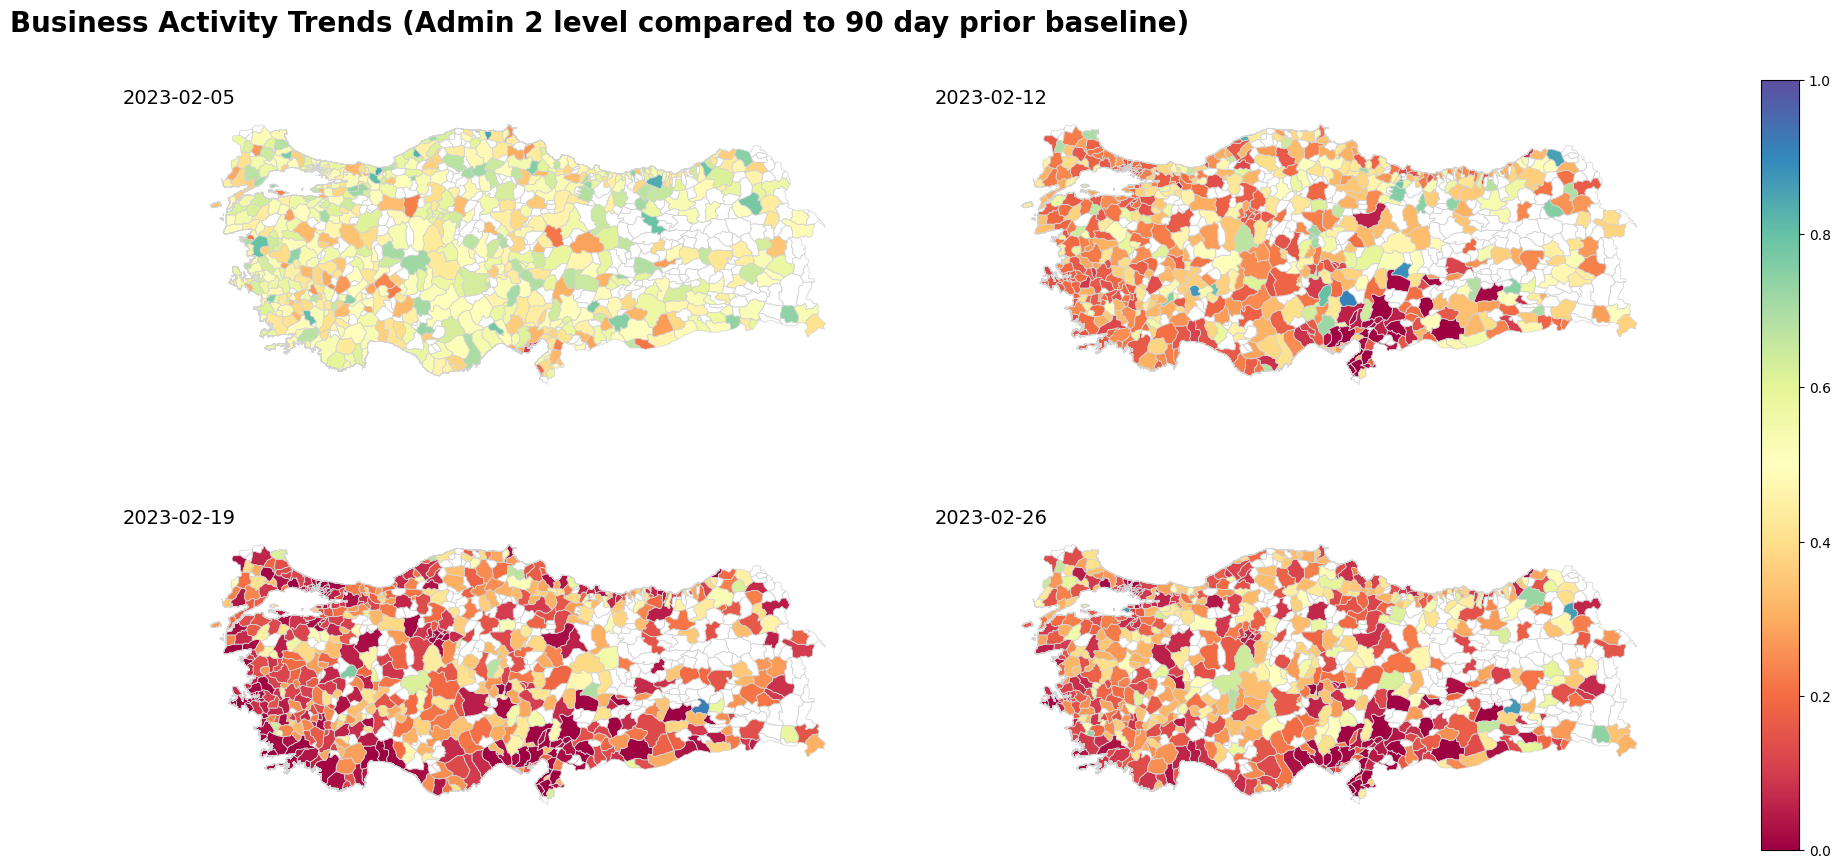

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(24, 10), sharex=True, sharey=True)
ax = axs.flatten()


dates_of_interest = ["2023-02-05", "2023-02-12", "2023-02-19", "2023-02-26"]
images = []

for i in range(0, len(dates_of_interest)):
    turkey_adm2.boundary.plot(ax=ax[i], edgecolor="#D3D3D3", linewidth=0.5)
    im = grp_gdf[(grp_gdf["ds"] == dates_of_interest[i])&
                   (grp_gdf['business_vertical']=='All')][["activity_quantile", "geometry"]].plot(
        column="activity_quantile",
        ax=ax[i],
        legend=False,
        cmap="Spectral",
        vmin=0,
        vmax=1,
    )
    
    images.append(im.collections[0])
    ax[i].set_title(
        f"{dates_of_interest[i]}",
        fontsize=14,
    )
    ax[i].title.set_position([0, 0])

    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)

cbar = fig.colorbar(images[1], ax=axs)
suptitle = fig.suptitle(
    "Business Activity Trends (Admin 2 level compared to 90 day prior baseline)",
    fontsize=20,
    fontweight="bold",
)
suptitle.set_y(0.95)
suptitle.set_x(0.3)
# ax[0].cax = cbar.ax[0]

for im in images:
    im.set_clim(vmin=0, vmax=1)
    im.set_cmap("Spectral")
    im.set_norm(cbar.norm)

## Plots
The following plots show the national average for activity quantile by business vertical. The plots show how business verticals recovered differently from the crisis event. 

In [ ]:
def get_line_plot(businessActivity, title, source, earthquakes=False, subtitle=None):
    p2 = figure(x_axis_type="datetime", width=800, height=400, toolbar_location="above")
    p2.add_layout(Legend(), "right")

    for id, business_vertical in enumerate(
        businessActivity["business_vertical"].unique()
    ):
        df = businessActivity[
            businessActivity["business_vertical"] == business_vertical
        ][["ds", "activity_quantile"]]
        # import pdb; pdb.set_trace()
        p2.line(
            df["ds"],
            df["activity_quantile"],
            line_width=2,
            line_color=color_palette[id],
            legend_label=business_vertical,
        )

    p2.legend.click_policy = "hide"
    if subtitle is not None:
        p2.title = subtitle

    title_fig = figure(
        title=title,
        toolbar_location=None,
        width=800,
        height=40,
    )
    title_fig.title.align = "left"
    title_fig.title.text_font_size = "20pt"
    title_fig.border_fill_alpha = 0
    title_fig.outline_line_width = 0

    # with silence(MISSING_RENDERERS):
    sub_title = figure(
        title=source,
        toolbar_location=None,
        width=800,
        height=40,
    )
    sub_title.title.align = "left"
    sub_title.title.text_font_size = "10pt"
    sub_title.title.text_font_style = "normal"
    sub_title.border_fill_alpha = 0
    sub_title.outline_line_width = 0

    layout = column(title_fig, p2, sub_title)

    if earthquakes:
        p2.renderers.extend(
            [
                Span(
                    location=datetime(2023, 2, 6),
                    dimension="height",
                    line_color="#7C7C7C",
                    line_width=2,
                    line_dash=(4, 4),
                ),
                Span(
                    location=datetime(2023, 2, 20),
                    dimension="height",
                    line_color="#7C7C7C",
                    line_width=2,
                    line_dash=(4, 4),
                ),
            ]
        )

    return layout

# Define color palette
color_palette = [
    "#4E79A7",  # Blue
    "#F28E2B",  # Orange
    "#E15759",  # Red
    "#76B7B2",  # Teal
    "#59A14F",  # Green
    "#EDC948",  # Yellow
    "#B07AA1",  # Purple
    "#FF9DA7",  # Pink
    "#9C755F",  # Brown
    "#BAB0AC",  # Gray
    "#7C7C7C",  # Dark gray
    "#6B4C9A",  # Violet
    "#D55E00",  # Orange-red
    "#CC61B0",  # Magenta
    "#0072B2",  # Bright blue
    "#329262",  # Peacock green
    "#9E5B5A",  # Brick red
    "#636363",  # Medium gray
    "#CD9C00",  # Gold
    "#5D69B1",  # Medium blue
]

In [17]:
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

tabs = []

# Taking the mean activity quantile for the entire country to allow for comparison with last year's data
df = (
    grp.groupby(["business_vertical", "ds"])
    .mean("activity_quantile")[["activity_quantile"]]
    .reset_index()
)
tabs.append(
    TabPanel(
        child=get_line_plot(
            df,
            "Business Activity in 2023",
            "Source: Data for Good Meta",
            earthquakes=True,
            subtitle="National average post earthquake compared to 90 day prior baseline",
        ),
        title="2023",
    )
)
tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)

Loading BokehJS ...

## Practice

Using the Business Activity Trends public dataset available at [HDX](https://data.humdata.org/dataset/facebook-business-activity-trends-during-covid19?fbclid=IwZXh0bgNhZW0CMTEAAR1FMJeXzPcttgPISP6SQp0LIuBCiKlc8Qvl75LfOYmn16QEpMPLlSUz0fw_aem_axfaii-50SG3O4PrMDF5lA), plot the activity quantile for 3 countries:
- Make a single plot with the vertical `all` for the three countries.
- Select 3 activities of your interest and create a figure with 3 subplots, one per activity, showing the results for the three already selected countries.

Can you extract any conclusions from the plot? 

Note: This dataset is only available at the national level.

## References

```{bibliography}
:filter: docname in docnames
```
